# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** *O.*

**Names:**

* *Argelaguet Franquelo, Pau*
* *Maillard, Mathias*
* *du Bois de Dunilac, Vivien*

---

#### Instructions

*This is a template for part 1 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

In [1]:
%matplotlib inline
import collections
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random
from scipy.stats import pareto
from random import choice

---

## 2.1 Exploration of real networks

#### Exercise 2.1

In [2]:
G1 = nx.read_adjlist("../data/network1.csv", delimiter=",", comments="#")
num_nodes = G1.number_of_nodes()

print("Number of nodes:", num_nodes)
print("Number of edges:", G1.number_of_edges())

Number of nodes: 13033
Number of edges: 18584


#### Exercise 2.2:  Node degree distribution

1) The used plot with logarithmic scale in both axis, to ensure correct visualization.

2) We can see that most nodes have small degree, so the distribution is decreasing towards few nodes with higher degrees.

3) This log-log plot looks like a pareto distribution as it is a straight line.

In [3]:
def plot_degrees(G):
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
    degree_count = collections.Counter(degree_sequence)

    plt.loglog(range(len(degree_count)), list([degree_count[i] for i in range(len(degree_count))]))
    plt.show()

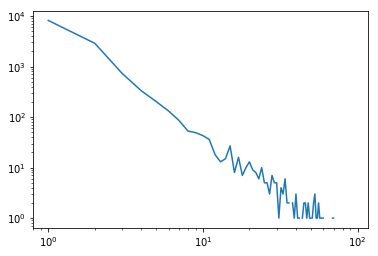

In [4]:
plot_degrees(G1)

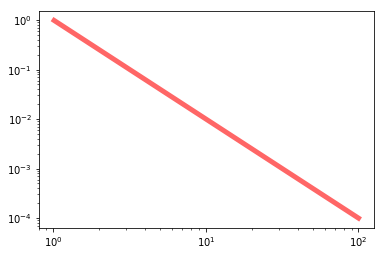

In [5]:
fig, ax = plt.subplots(1, 1)
b = 1
x = np.linspace(pareto.ppf(0.01, b), pareto.ppf(0.99, b), 100)
ax.loglog(x, pareto.pdf(x, b), 'r-', lw=5, alpha=0.6, label='pareto pdf')

plt.show()

#### Exercise 2.3: Giant component

In [6]:
print("Number of connected components:", nx.number_connected_components(G1))

giant = max(nx.connected_component_subgraphs(G1), key=len)
print("Number of nodes in the giant component:", giant.number_of_nodes())

Number of connected components: 192
Number of nodes in the giant component: 12576


#### Exercise 2.4: Short paths & Small-worlds

In [7]:
def average_distance(G, steps):
    graph_nodes = G1.nodes()
    n_nodes = G1.number_of_nodes()
    distance_counter = 0.0
    unreachable_counter = 0
    for i in range(steps):
        try:
            distance_counter += nx.shortest_path_length(G1, source=str(random.randint(0,n_nodes-1)), target=str(random.randint(0,n_nodes-1)))
        except:
            unreachable_counter += 1

    print("The average length of the path between two connected nodes:", distance_counter / (steps-unreachable_counter))
    print(unreachable_counter, "out of", steps, "paths did not exist.")

In [8]:
average_distance(G1, 20000)

The average length of the path between two connected nodes: 4.1744818304172275
1425 out of 20000 paths did not exist.


In [9]:
def graph_growth(G, size, steps):
    print("Average number of nodes reachable from any node in the graph:")
    n_nodes = G.number_of_nodes()
    for cut in range(size):
        counter = 0
        for i in range(steps):
            counter += len(nx.single_source_shortest_path_length(G ,source=str(random.randint(0, n_nodes-1)), cutoff=cut+1))
    
        print("  For cutoff", cut+1, ":", counter / steps)

In [10]:
graph_growth(G1, 5, 1000)

Average number of nodes reachable from any node in the graph:
  For cutoff 1 : 3.357
  For cutoff 2 : 430.592
  For cutoff 3 : 2964.26
  For cutoff 4 : 7982.696
  For cutoff 5 : 10993.042


Yes, network1 is a small world, because we can see that within a small distance, we can reach an important portion of the network.

#### Exercise 2.5: Network comparison

In [11]:
G2 = nx.read_adjlist("../data/network2.csv", delimiter=",", comments="#")

print("Number of nodes:", G2.number_of_nodes())
print("Number of edges:", G2.number_of_edges())

print("Number of connected components:", nx.number_connected_components(G2))

giant = max(nx.connected_component_subgraphs(G2), key=len)
print("Number of nodes in the giant component:", giant.number_of_nodes())

Number of nodes: 26542
Number of edges: 43516
Number of connected components: 5
Number of nodes in the giant component: 26481


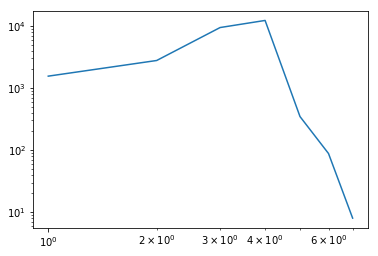

In [12]:
plot_degrees(G2)

In [13]:
average_distance(G2, 20000)

The average length of the path between two connected nodes: 4.17913734758554
1383 out of 20000 paths did not exist.


In [14]:
print("Average number of nodes reachable from any node in the graph:")
n_nodes = G2.number_of_nodes()

for cut in range(25):
    counter = 0
    steps = 1000
    list_keys = list(G2.nodes())
    for i in range(steps):
        counter += len(nx.single_source_shortest_path_length(G2 ,source=str(choice(list_keys)), cutoff=cut+1))
    
    print("For cutoff", cut+1, ":", counter / steps)

Average number of nodes reachable from any node in the graph:
For cutoff 1 : 4.286
For cutoff 2 : 10.75
For cutoff 3 : 20.585
For cutoff 4 : 34.446
For cutoff 5 : 50.851
For cutoff 6 : 72.267
For cutoff 7 : 96.285
For cutoff 8 : 123.207
For cutoff 9 : 158.374
For cutoff 10 : 195.1
For cutoff 11 : 234.502
For cutoff 12 : 273.329
For cutoff 13 : 324.171
For cutoff 14 : 371.632
For cutoff 15 : 427.007
For cutoff 16 : 490.332
For cutoff 17 : 548.815
For cutoff 18 : 611.575
For cutoff 19 : 671.476
For cutoff 20 : 748.081
For cutoff 21 : 837.246
For cutoff 22 : 912.519
For cutoff 23 : 986.34
For cutoff 24 : 1082.201
For cutoff 25 : 1175.988


This network has the double of nodes than the previous one, but still in the same order of magnitude. On the other hand, it is way more connected, because in network 1 the number of nodes and edges is similar, but in the second, number of edges is almost the double of nodes. 

It is as well more connected as we can see in degree distribution, where the decrease of frequency of nodes with higher degree is not immediate as it was previously.

#### Exercise 2.6: Network identification

G1 is probably the routers and G2 is probably the roads, the most significant factor in our decision is the growth rate of both networks.